**Video Game Ratings With Platform**


---




##Introduction

As the years go on video games have been getting more popular, and along with that ratings have come out for each game. As time has gone by technology has gotten much better and so have the details of video games. The Data that I have collected and presented is here to show you what games you might want to try out, or help you get into gaming. I also wanted to be able to show people that just because these games are newer with better graphics and technology doesn't mean they will have a higher rating. Just because a video game is old doesn't mean it is going to be worse than one that comes out today.

### Cleaning Data With Panda and Importing Dependencies

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### Changing Color for Mathplot

In [71]:
sns.color_palette("viridis",as_cmap=True)

### Displaying My Data Sheet

In [60]:
filename = "my_all_games.csv"
score_df = pd.read_csv(filename)
score_df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",98,8.4
2,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
3,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
4,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,98,7.4


### Exploring Data

In [61]:
score_df.dtypes

name             object
platform         object
release_date      int64
summary          object
meta_score        int64
user_review     float64
dtype: object

In [62]:
score_df.describe()

,release_date,meta_score,user_review
count,17435.000000,17435.000000,17435.000000
mean,2011.253456,71.199656,6.990846
std,6.106982,12.210737,1.351554
min,1995.000000,20.000000,0.200000
25%,2006.000000,64.000000,6.300000
50%,2011.000000,73.000000,7.300000
75%,2017.000000,80.000000,7.900000
max,2021.000000,99.000000,9.700000


### Release Date Per User and Meta Rating

To show that even though video games nowadays have overall better quality the ratings can still have a huge difference. This is because not all video games that are made with better quality can be rushed or have a poor storyline which can lead to a lower rating.

In [63]:
score_df.groupby("release_date")[list(score_df.columns[-1:])[0]].mean()

release_date
1995    8.600000
1996    8.350000
1997    8.460714
1998    8.406977
1999    8.473077
2000    7.588350
2001    7.536907
2002    7.410511
2003    7.546566
2004    7.486207
2005    7.357663
2006    7.258385
2007    7.044811
2008    7.067180
2009    7.041686
2010    7.121800
2011    6.782646
2012    6.819565
2013    6.798810
2014    6.847382
2015    6.823333
2016    6.708686
2017    6.745473
2018    6.714299
2019    6.533778
2020    6.618391
2021    6.773488
Name: user_review, dtype: float64

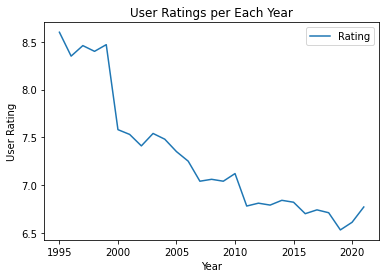

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.color_palette("viridis",as_cmap=True)
 
x  = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
y1 = [8.60, 8.35, 8.46, 8.40, 8.47, 7.58, 7.53, 7.41, 7.54, 7.48, 7.35, 7.25, 7.04, 7.06, 7.04, 7.12, 6.78, 6.81, 6.79, 6.84, 6.82, 6.70, 6.74, 6.71, 6.53, 6.61, 6.77 ]
plt.plot(x, y1, label="Rating")
plt.plot()

plt.xlabel("Year")
plt.ylabel("User Rating")
plt.title("User Ratings per Each Year")
plt.legend()
plt.show()

 As you can see with the user rating there is a negative correlation between the year it was made and the rating it received. This shows us that when looking for new games to try out you might not always want to go right for the newest game out.

In [64]:
score_df.groupby("release_date")[list(score_df.columns[-2:])[0]].mean()

release_date
1995    86.000000
1996    85.450000
1997    85.107143
1998    83.186047
1999    83.615385
2000    73.760518
2001    72.426804
2002    71.279279
2003    71.405220
2004    70.490255
2005    70.425879
2006    68.049689
2007    67.504717
2008    68.126777
2009    69.685912
2010    70.581749
2011    69.733010
2012    70.563939
2013    70.694444
2014    71.260471
2015    71.908333
2016    71.681144
2017    72.816901
2018    72.373969
2019    73.190965
2020    73.065831
2021    74.914591
Name: meta_score, dtype: float64

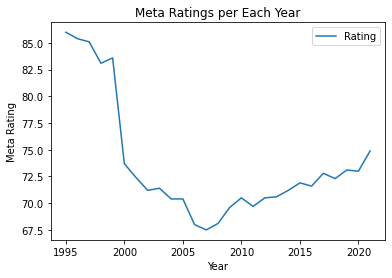

In [67]:
import matplotlib.pyplot as plt
import numpy as np
 
x  = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
y1 = [86.0, 85.4, 85.1, 83.1, 83.6, 73.7, 72.4, 71.2, 71.4, 70.4, 70.4, 68.0, 67.5, 68.1, 69.6, 70.5, 69.7, 70.5, 70.6, 71.2, 71.9, 71.6, 72.8, 72.3, 73.1, 73.0, 74.9]
plt.plot(x, y1, label="Rating")
plt.plot()

plt.xlabel("Year")
plt.ylabel("Meta Rating")
plt.title("Meta Ratings per Each Year")
plt.legend()
plt.show()

With this graph, we can see that there was a huge drop off in meta rating right around the year 2000. This graph has a negative correlation as it started off with really good ratings early on and went down over the years. As the years went on though there was an upward trend in the graph which could be a sign for better things to come.

In [65]:
score_df.groupby("release_date")[list(score_df.columns[-1:])[0]].count()

release_date
1995       1
1996      20
1997      28
1998      43
1999      52
2000     309
2001     485
2002     666
2003     728
2004     667
2005     796
2006     805
2007     848
2008     844
2009     866
2010     789
2011     824
2012     782
2013     756
2014     764
2015     840
2016     944
2017     994
2018    1091
2019     974
2020     957
2021     562
Name: user_review, dtype: int64

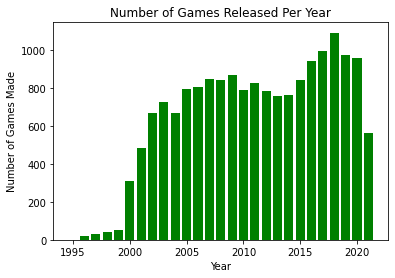

In [79]:
import matplotlib.pyplot as plt

x  = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
y = [1, 20, 28, 43, 52, 309, 485, 666, 728, 667, 796, 805, 848, 844, 866, 789, 824, 782, 756, 764, 840, 944, 994, 1091, 974, 957, 562]

plt.bar(x, y, label="", color='g')
plt.plot()

plt.xlabel("Year")
plt.ylabel("Number of Games Made")
plt.title("Number of Games Released Per Year")
plt.show()

This graph is able to show us the sample size that is used each year showing the number of games that were released that year. This can show us that some of the games that were made early on might not hold as much value as the games that are made today. This is because the rating didn't have as many games to go against so the rating could be affected by that.

### Games per Platform

In [68]:
c_platform = score_df["platform"].value_counts().reset_index()
c_platform.columns = ["Platform", "Count"]
c_platform

,Platform,Count
0,PC,4660
1,PlayStation 4,1950
2,Xbox 360,1547
3,PlayStation 2,1311
4,Switch,1216
5,PlayStation 3,1208
6,Xbox One,1089
7,Xbox,686
8,DS,599
9,Wii,597


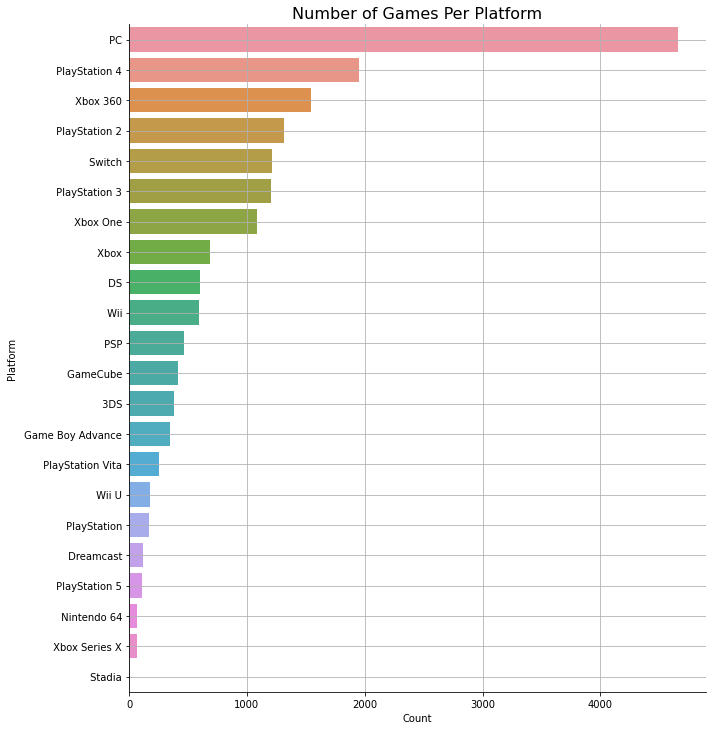

In [69]:
sns.catplot(x="Count", y="Platform", kind="bar", data=c_platform, height=10)
plt.title('Number of Games Per Platform',fontsize=16)

plt.grid(True)

This graph is able to show us the games there are per platform. PCs have the most due to their processing power and overall Compatability with games. Some games are bought out by certain businesses. This can lead to some gaming systems having different games or more games overall. This is able to help newcomers of video games to help make their decision on what system they can buy. 

## Conclusion

The goal that I wanted to achieve by showing people these graphs and data is overall help for people who wither want a new game to play or want to get into gaming. These graphs that were shown are to show how the further down the years the lower that ratings have gotten. The data is able to tell you how just because you have better technology and platforms today it doesn't mean that the games are going to be better. To get help into seeing what games to buy for the future you can look at the graphs and datasets to narrow down the choice. Overall, gaming nowadays can vary on rating and quality this data is able to help people choose new games to play or help someone new to gaming start.

### Work Cited

https://www.kaggle.com/

https://en.wikipedia.org/wiki/List_of_best-selling_video_games


